<a href="https://colab.research.google.com/github/AndriiShvahuliak/Deep-Learning-Foundation/blob/main/DeepLearningFoundation_using_PyTorch_and_PyTorch_lightning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Foundation using PyTorch and PyTorch lightning

## 1. Data import and exploration




In [ ]:
# install pytorch lightning
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 18.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning import LightningModule
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset, random_split
from imblearn.over_sampling import RandomOverSampler
from tqdm.auto import tqdm
from timeit import default_timer as timer
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
# let's import the dataset
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None, names=col_names)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


Our data is fully numeric, there is no NaN values, the target variable is imbalanced.

## 2. Data Preparation

As our data has no NaN values and is fully numeric, we only need to deal with class imbalance in target variable, split our data and convert data to tensor type. Also it will be a good practice to scale our data, as Neural Network works better with scaled data, for that I will use MinMaxScaler.

In [ ]:
# First we scale the data
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

In [ ]:
X.size

6144

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

I chose MinMaxScaler. I have tried StandardScaler and RobustScaler and they both seemed to be making the model overfitting, but minmaxscaler managed to do better than those 2. Probably it is due to different scaling techniques.

In [ ]:
X_scaled.size

6144

In [ ]:
# for dealing with oversampling I will use RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
X_resampled.size

8000

In [ ]:
y_resampled.size

1000

In [ ]:
counts = np.unique(y_resampled, return_counts=True)
counts

(array([0, 1]), array([500, 500]))

In [ ]:
print(pd.Series(y_resampled).value_counts())

1    500
0    500
Name: count, dtype: int64


So, we have X_sampled with 8 columns and 1000 rows, and y_sampled with 1 column and 1000 rows(500 for value 0, and 500 for 1), now we don't have imbalanced target variable.

In [ ]:
# Now we split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

In [ ]:
# Here we convert features and labels to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# To create DataLoaders we first need to create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
# so, TensorDataset - combines features and labels for each dataset
# and DataLoader - batches and shuffles the training data for efficient processing

We use DataLoaders to efficiently load data in batches, save memory, shuffle data for better training and simplify iteration during model training.

## 3. Modeling with PyTorch

### 3.1 First PyTorch NeuralNetwork model

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

class DiabetesCLFModelV1(nn.Module):
  def __init__(self, input_features, output_features):
    super().__init__()
    self.linear1 = nn.Linear(input_features, 128)

    self.linear2 = nn.Linear(128, 128)

    self.linear3 = nn.Linear(128, output_features)

  def forward(self, x):
    x = F.relu(self.linear1(x))

    x = F.relu(self.linear2(x))

    x = self.linear3(x)

    return x

model_v1 = DiabetesCLFModelV1(input_features=8, output_features=1)
model_v1

DiabetesCLFModelV1(
  (linear1): Linear(in_features=8, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=1, bias=True)
)

This model is a simple neural network designed for classification tasks.

- The first layer takes the input features and outputs 128 values, essentially transforming the data into a new space.
- The second layer processes those 128 values and outputs another 128 values, adding more complexity.
- The third layer takes the 128 values and produces the final output, which matches the number of target classes.

In the forward function, the input goes through the first layer, then through the ReLU activation function to catch non-linear trends. This process is repeated for the second layer. The final layer directly gives the output without any activation, leaving it as raw predictions. The model is basic and doesn't have techniques like regularization, which might make it more prone to overfitting.

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### 3.2 Train and Test loop functions

In [ ]:
# setup the device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# this function is for printing difference between start and end time(so measure the train time of model)
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

These train and test functions I found here - https://www.learnpytorch.io/03_pytorch_computer_vision/#62-functionizing-training-and-test-loops

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # Reshape y to match y_pred
        y = y.view(-1, 1)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate loss as a scalar
        train_acc += accuracy_fn(y_true=y, y_pred=(y_pred > 0).int())  # Binary threshold at 0.5

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # put model in eval mode
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # Reshape y to match y_pred
            y = y.view(-1, 1)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=(test_pred > 0).int())

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


### 3.3 Evaluating model_v1

In [ ]:
# torch.manual_seed(42)
# np.random.seed(42)

# # now we define loss function and optimizer
# loss_fn = nn.BCEWithLogitsLoss() # - we use this one because it includes sigmoid activation which we need
# optimizer = torch.optim.SGD(model_v1.parameters(), lr=0.01)

# # Measure time
# train_time_start_on_gpu = timer()

# epochs = 100
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )
#     test_step(data_loader=test_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

After training our first model we can see that results are pretty decent,(approximately) train = 78% and test = 78% (they are really close).

Let's try to use different optimizer, Adam.




In [ ]:
# torch.manual_seed(42)
# np.random.seed(42)

# model_v1 = DiabetesCLFModelV1(input_features=8, output_features=1)
# loss_fn = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.Adam(model_v1.parameters(), lr=0.001) # changed optimizer to Adam

# train_time_start_on_gpu = timer()

# epochs = 100
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )
#     test_step(data_loader=test_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

Interesting. Our model performs better with Adam optimizer but it seems to be overfitting, let's try to use smaller learning rate like 0.0001.

In [ ]:
# torch.manual_seed(42)
# np.random.seed(42)

# model_v1 = DiabetesCLFModelV1(input_features=8, output_features=1)
# loss_fn = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.Adam(model_v1.parameters(), lr=0.00005)

# train_time_start_on_gpu = timer()

# epochs = 100
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )
#     test_step(data_loader=test_loader,
#         model=model_v1,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

So, model_v1 with SGD and lr=0.01 performed as good as Adam with lr=0.00005. But Adam with 0.001 is overfitting on train data, let's try to create new more complicated model and add more layers with Dropout and regularization to fix overfitting and test it again with SGD and Adam and see the final results. For now our best result is this:
- Train loss: 0.46523 | Train accuracy: 77.71%
- Test loss: 0.48007 | Test accuracy: 77.67%

### 3.4 Model_v2

In [ ]:
class DiabetesCLFModelV2(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()

        self.linear1 = nn.Linear(input_features, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.drop1 = nn.Dropout(p=0.5)

        self.linear2 = nn.Linear(256, 512)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.drop2 = nn.Dropout(p=0.5)

        self.linear3 = nn.Linear(512, 256)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.drop3 = nn.Dropout(p=0.5)

        self.linear4 = nn.Linear(256, output_features)

    def forward(self, x):
      x = F.relu(self.linear1(x))
      x = self.batch_norm1(x)
      x = self.drop1(x)

      x = F.relu(self.linear2(x))
      x = self.batch_norm2(x)
      x = self.drop2(x)

      x = F.relu(self.linear3(x))
      x = self.batch_norm3(x)
      x = self.drop3(x)

      x = self.linear4(x)

      return x

This model is a more advanced version of the first, aimed at reducing overfitting and improving learning stability.

- The first layer outputs 256 values, followed by batch normalization for stable learning and dropout to reduce overfitting.
- The second layer expands to 512 values, with the same normalization and dropout.
- The third layer reduces back to 256 values, again applying normalization and dropout.
- The final layer produces the output, matching the target dimensions.

In the forward function, input data flows through each layer, with ReLU activations after the first three layers for non-linearity. Batch normalization ensures stable outputs, and dropout prevents reliance on specific neurons.

Unlike the first model, the second adds batch normalization and dropout, which help reduce overfitting and improve training stability. It also uses more layers and higher intermediate dimensions, increasing its capacity to learn complex patterns. These changes make the second model better suited for generalizing to unseen data in theory, we will see if it's better or not.

In [ ]:
# torch.manual_seed(42)
# np.random.seed(42)

# model_v2 = DiabetesCLFModelV2(input_features=8, output_features=1)
# loss_fn = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.SGD(model_v2.parameters(), lr=0.00001)


# train_time_start_on_gpu = timer()

# epochs = 100
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_loader,
#         model=model_v2,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )
#     test_step(data_loader=test_loader,
#         model=model_v2,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

Results for SGD lr=0.01:
- 50 epochs:
  - Train loss: 0.10521 | Train accuracy: 95.86%
  - Test loss: 0.83959 | Test accuracy: 76.67%
- 100 epochs:
  - Train loss: 0.00182 | Train accuracy: 100.00%
  - Test loss: 1.22179 | Test accuracy: 79.67%

Results for SGD lr=0.001:
- 50 epochs:
  - Train loss: 0.17549 | Train accuracy: 94.00%
  - Test loss: 0.53707 | Test accuracy: 80.00%
- 100 epochs:
  - Train loss: 0.05621 | Train accuracy: 99.00%
  - Test loss: 0.73896 | Test accuracy: 82.00%

Results for SGD lr=0.0001:
- 50 epochs:
  - Train loss: 0.40853 | Train accuracy: 81.86%
  - Test loss: 0.48787 | Test accuracy: 76.67%
- 100 epochs:
  - Train loss: 0.34731 | Train accuracy: 85.57%
  - Test loss: 0.47525 | Test accuracy: 77.67%

Results for SGD lr=0.00005:
- 50 epochs:
  - Train loss: 0.45716 | Train accuracy: 79.14%
  - Test loss: 0.50453 | Test accuracy: 75.67%
- 100 epochs:
  - Train loss: 0.40800 | Train accuracy: 81.57%
  - Test loss: 0.48595 | Test accuracy: 75.33%

Results for SGD lr=0.00001:
- 100 epochs:
  - Train loss: 0.52147 | Train accuracy: 77.29%
  - Test loss: 0.54617 | Test accuracy: 76.67%

Model still tends to overfit, If we lower learning rate the lower will be the accuracy and we can fix overfitting but results are worse than in first model_v1. Let's try Adam.

In [ ]:
# torch.manual_seed(42)
# np.random.seed(42)

# model_v2 = DiabetesCLFModelV2(input_features=8, output_features=1)
# loss_fn = nn.BCEWithLogitsLoss()
# optimizer = torch.optim.Adam(model_v2.parameters(), lr=0.000001)


# train_time_start_on_gpu = timer()

# epochs = 100
# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")
#     train_step(data_loader=train_loader,
#         model=model_v2,
#         loss_fn=loss_fn,
#         optimizer=optimizer,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )
#     test_step(data_loader=test_loader,
#         model=model_v2,
#         loss_fn=loss_fn,
#         accuracy_fn=accuracy_fn,
#         device=device
#     )

# train_time_end_on_gpu = timer()
# total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
#                                             end=train_time_end_on_gpu,
#                                             device=device)

Results for Adam `lr=0.001`:
- 50 epochs:
  - Train loss: 0.15714 | Train accuracy: 95.57%
  - Test loss: 1.00434 | Test accuracy: 80.67%
- 100 epochs:
  - Train loss: 0.00577 | Train accuracy: 99.86%
  - Test loss: 1.64907 | Test accuracy: 81.00%

Results for Adam `lr=0.0001`:
- 50 epochs:
  - Train loss: 0.01220 | Train accuracy: 99.86%
  - Test loss: 1.12092 | Test accuracy: 81.67%
- 100 epochs:
  - Train loss: 0.00079 | Train accuracy: 100.00%
  - Test loss: 1.34978 | Test accuracy: 81.00%

Results for Adam `lr=0.00001`:
- 50 epochs:
  - Train loss: 0.26529 | Train accuracy: 89.71%
  - Test loss: 0.49258 | Test accuracy: 77.67%
- 100 epochs:
  - Train loss: 0.14119 | Train accuracy: 96.14%
  - Test loss: 0.57390 | Test accuracy: 81.00%

Results for Adam `lr=0.000001`:
- 50 epochs:
  - Train loss: 0.45795 | Train accuracy: 80.00%
  - Test loss: 0.50530 | Test accuracy: 75.67%
- 100 epochs:
  - Train loss: 0.39842 | Train accuracy: 82.71%
  - Test loss: 0.48547 | Test accuracy: 76.33%


So, after many tests and tries, I can clearly say that this is the best result(for me):
- Train loss: 0.46319 | Train accuracy: 77.86%
- Test loss: 0.47379 | Test accuracy: 77.33%

It was achieved using the first simple model. Adding complexity like in the second model didn't improve results, infact it just made model to overfit more.

### PyTorch Lightning

Let's try to recreate our first model using `pytorch_lightning`.

In [ ]:
torch.manual_seed(42)
np.random.seed(42)

class DiabetesLightningModel(LightningModule):
    def __init__(self, input_features, output_features): # same model structure as for model_v1
        super().__init__()
        self.linear1 = torch.nn.Linear(input_features, 128)
        self.linear2 = torch.nn.Linear(128, 128)
        self.linear3 = torch.nn.Linear(128, output_features)
        self.loss_fn = torch.nn.BCEWithLogitsLoss()

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return self.linear3(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        loss = self.loss_fn(y_hat, y)

        # calculate accuracy
        y_pred = torch.sigmoid(y_hat) > 0.5
        acc = accuracy_fn(y, y_pred)

        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)

        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x).squeeze()
        test_loss = self.loss_fn(y_hat, y)

        y_pred = torch.sigmoid(y_hat) > 0.5
        test_acc = accuracy_fn(y, y_pred)

        self.log("test_loss", test_loss, prog_bar=True)
        self.log("test_acc", test_acc, prog_bar=True)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.01) # use SGD and lr=0.01



In [ ]:
torch.manual_seed(42)
np.random.seed(42)

input_features = X_train.shape[1]
output_features = 1

model = DiabetesLightningModel(input_features, output_features)

trainer = pl.Trainer(max_epochs=20, log_every_n_steps=1)
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)

trainer.test(model, dataloaders=test_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type              | Params | Mode 
------------------------------------------------------
0 | linear1 | Linear            | 1.2 K  | train
1 | linear2 | Linear            | 16.5 K | train
2 | linear3 | Linear            | 129    | train
3 | loss_fn | BCEWithLogitsLoss | 0      | train
------------------------------------------------------
17.8 K    Trainable params
0         Non-trainable params
17.8 K    Total params
0.071     Total estimated model params size (MB)
4         Modules in train mode
0         Modul

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │     70.33333587646484     │
│         test_loss         │    0.5363509654998779     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5363509654998779, 'test_acc': 70.33333587646484}]

What we did in the code:

1. Model Structure:
   - We created a model class `DiabetesLightningModel` using `LightningModule`, which includes fully connected layers and the `BCEWithLogitsLoss` for binary classification.

2. Training Step:
   - The `training_step` method calculates the loss and accuracy for each batch and logs them using `self.log()` to track progress.

3. Test Step:
   - The `test_step` method evaluates the model after training, calculating and logging test loss and accuracy.

4. Optimizer:
   - We used SGD with a learning rate of 0.01 to optimize the model's parameters.

5. Training and Testing:
   - `trainer.fit()` starts the training process, and `trainer.test()` evaluates the model after training. PyTorch Lightning automatically handles the loops and updates.

6. Logging:
   - Metrics like loss and accuracy are logged with `self.log()` for easy tracking during training and testing.


Differences Between PyTorch Lightning and Pure PyTorch:

- Code Organization:
  - PyTorch Lightning uses the `LightningModule` for organizing the model, while pure PyTorch requires manually writing training and testing loops.

- Automatic Training Loop:
  - PyTorch Lightning automatically handles loops, batching, and gradient updates, reducing boilerplate code.

- Easier Logging:
  - `self.log()` simplifies tracking metrics compared to manually managing logs in pure PyTorch.

- GPU Management:
  - PyTorch Lightning handles moving the model to the GPU automatically, unlike pure PyTorch where you need to use `.to(device)`.

- Less Boilerplate:
  - PyTorch Lightning reduces repetitive code, making the model definition and training process cleaner and more maintainable.



## Convolution operation(1D)

In [ ]:
def conv1d(input_array, kernel, stride=1, padding=0):
    input_array = np.array(input_array)
    kernel = np.array(kernel)


    if padding > 0:
        input_array = np.pad(input_array, (padding, padding), mode='constant', constant_values=0)

    output_length = ((len(input_array) - len(kernel)) // stride) + 1
    result = np.zeros(output_length)

    for i in range(output_length):
        start = i * stride
        end = start + len(kernel)
        result[i] = np.sum(input_array[start:end] * kernel)

    return result

input_signal = [1, 2, 3, 4, 5]
kernel = [1, 0, -1]
output = conv1d(input_signal, kernel, stride=1, padding=1)
print("Input Signal:", input_signal)
print("Kernel:", kernel)
print("Output Signal:", output)


Input Signal: [1, 2, 3, 4, 5]
Kernel: [1, 0, -1]
Output Signal: [-2. -2. -2. -2.  4.]


This function performs a 1D convolution, a process of sliding a kernel over the input signal to produce an output signal.

- Input and Kernel: Converts the input signal and kernel into NumPy arrays for easier operations.

- Padding: Adds zeros to the beginning and end of the input signal if padding is specified. This ensures that edge values are processed correctly.

- Output Size: Calculates the length of the output signal based on the input size, kernel size, stride (step size), and padding.

- Sliding Window: Slides the kernel over the input signal using the stride. At each position, it multiplies the kernel values with the corresponding input values and sums the result.

- Output: Stores these summed values in the output signal array.

For example, with input signal [1, 2, 3, 4, 5] and a kernel [1, 0, -1], the function detects changes between neighboring values (like edge detection), producing an output that shows these variations. Adding padding and using a stride of 1 ensures every part of the signal is processed.

**Tradeoff: Large vs Small Kernel Size**

Large Kernel Size:

- Captures more context or trends in the data (like smoother denoising or low frequency patterns).
Computationally expensive as more elements are involved in each convolution step.
Risk of losing finer details or introducing oversmoothing.

Small Kernel Size:

- Captures localized details, such as edges or sharp transitions.
Faster to compute and less resource-intensive.
May retain noise or fail to capture larger patterns in the signal.


Typically a kernel of size 3–5 is used to balance detail preservation and noise reduction.

A large kernel might smooth noise well but lose important signal characteristics, whereas a small kernel might preserve these characteristics but retain noise.

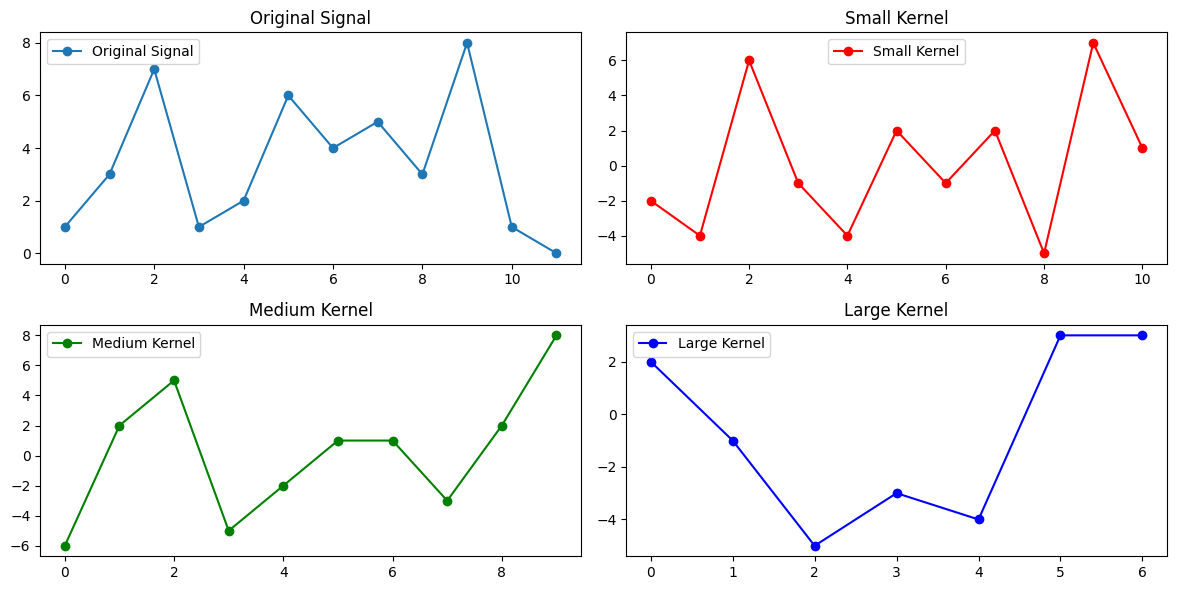

In [ ]:
input_signal = [1, 3, 7, 1, 2, 6, 4, 5, 3, 8, 1, 0]

small_kernel = [1, -1]
medium_kernel = [1, 0, -1]
large_kernel = [1, 1, 1, -1, -1, -1]

# here we perform convolutions
output_small = conv1d(input_signal, small_kernel, stride=1, padding=0)
output_medium = conv1d(input_signal, medium_kernel, stride=1, padding=0)
output_large = conv1d(input_signal, large_kernel, stride=1, padding=0)

plt.figure(figsize=(12, 6))

# original kernel
plt.subplot(2, 2, 1)
plt.plot(input_signal, label='Original Signal', marker='o')
plt.title("Original Signal")
plt.legend()

# small kernel
plt.subplot(2, 2, 2)
plt.plot(output_small, label='Small Kernel', color='r', marker='o')
plt.title("Small Kernel")
plt.legend()

# medium kernel
plt.subplot(2, 2, 3)
plt.plot(output_medium, label='Medium Kernel', color='g', marker='o')
plt.title("Medium Kernel")
plt.legend()

# large kernel
plt.subplot(2, 2, 4)
plt.plot(output_large, label='Large Kernel', color='b', marker='o')
plt.title("Large Kernel")
plt.legend()

plt.tight_layout()
plt.show()


The original signal shows sharp changes with peaks and valleys.

Using a small kernel ([1, -1]), the result highlights rapid changes but amplifies noise, making it ideal for detecting fine details or edges.

The medium kernel ([1, 0, -1]) smooths out some noise while retaining important patterns, striking a balance between detail and noise reduction.

The large kernel ([1, 1, 1, -1, -1, -1]) averages over a broader range, significantly reducing noise but also losing finer details, making it better for observing overall trends.

The choice of kernel size depends on the goal: smaller kernels focus on details, while larger ones prioritize noise reduction and trends.

## Convolution operation(2D)

For this I will import a special dataset, that you can find here - https://github.com/mrdbourke/pytorch-deep-learning/tree/main/data

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
def conv2d(input_image, kernel, stride=1, padding=0):
    C, H, W = input_image.shape
    _, kh, kw = kernel.shape

    if padding > 0:
        padded_image = np.pad(input_image,
                              pad_width=((0, 0), (padding, padding), (padding, padding)),
                              mode='constant',
                              constant_values=0)
    else:
        padded_image = input_image

    out_height = (H - kh + 2 * padding) // stride + 1
    out_width = (W - kw + 2 * padding) // stride + 1

    output = np.zeros((C, out_height, out_width))

    for c in range(C):
        for i in range(0, out_height):
            for j in range(0, out_width):
                start_h, start_w = i * stride, j * stride
                end_h, end_w = start_h + kh, start_w + kw
                output[c, i, j] = np.sum(
                    padded_image[c, start_h:end_h, start_w:end_w] * kernel[c]
                )

    return output

Custom 2D convolution function (conv2d). It takes an input image, a kernel (filter), stride and padding as inputs. It applies zero-padding to the image if specified, computes the output dimensions based on the image size, kernel size, stride and padding and then performs the convolution operation channel by channel (for R G B). The result is an output image where the kernel has been applied to every region, highlighting specific features such as edges.

In [ ]:
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

train_dir = image_path / "train"
test_dir = image_path / "test"

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_dataloader = DataLoader(dataset=train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

class_names = train_data.classes
print(f"Classes: {class_names}")


Classes: ['pizza', 'steak', 'sushi']


Here we set up the data preprocessing pipeline using PyTorch's transforms.Compose. It resizes images to 64x64 pixels and converts them into tensors (numerical data that PyTorch models can process). It then uses the ImageFolder class to load images from specified directories (train and test) and organizes them into datasets. Data loaders are created to handle batches of images for training and testing. Finally, it prints the class names (like pizza, steak, sushi) for reference.

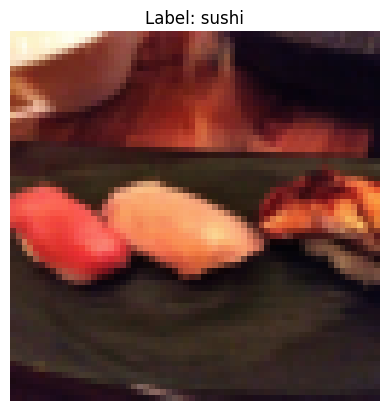

In [ ]:
image_batch, labels_batch = next(iter(train_dataloader))
image = image_batch[0]

plt.imshow(image.permute(1, 2, 0))
plt.title(f"Label: {class_names[labels_batch[0]]}")
plt.axis("off")
plt.show()


Here we retrieve a batch of images and their labels from the training data loader and visualizes the first image in the batch. The permute function rearranges the tensor dimensions from (C, H, W) (PyTorch format) to (H, W, C) (matplotlib format).

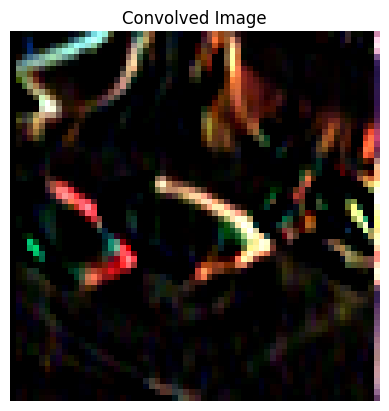

In [ ]:
image_np = image.numpy()

sobel_kernel = np.array([
    [[1, 0, -1], [2, 0, -2], [1, 0, -1]],
    [[1, 0, -1], [2, 0, -2], [1, 0, -1]],
    [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
])

output_image = conv2d(image_np, sobel_kernel, stride=1, padding=1)

plt.imshow(output_image.transpose(1, 2, 0))
plt.title("Convolved Image")
plt.axis("off")
plt.show()

Here we convert the selected image into a NumPy array to be compatible with the custom conv2d function. A Sobel kernel is defined for edge detection, where the kernel highlights vertical edges in the image. The convolution function is applied to the image using this kernel, producing an output image that emphasizes edges. Then we visualize resulting convolved image.

The showed convolved image shows how convolution with a specific filter, like the Sobel kernel, extracts features from the original image. In this case, it highlights edges and transitions by emphasizing areas of high contrast, making the boundaries and patterns more visible while suppressing flat or uniform regions.








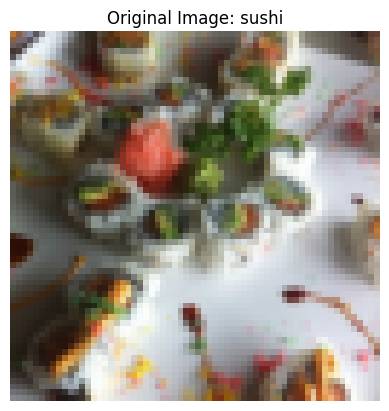

In [ ]:
image_batch, labels_batch = next(iter(train_dataloader))
real_image = image_batch[0]

plt.imshow(real_image.permute(1, 2, 0))
plt.title(f"Original Image: {class_names[labels_batch[0]]}")
plt.axis("off")
plt.show()

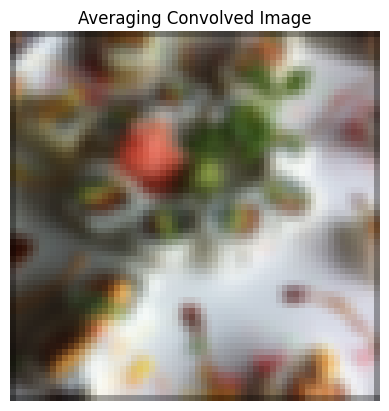

In [ ]:
# custom convolution with an averaging kernel
avg_kernel = np.ones((3, 3, 3)) / 9  # averaging kernel
output_avg = conv2d(real_image.numpy(), avg_kernel, stride=1, padding=1)

plt.imshow(output_avg.transpose(1, 2, 0))
plt.title("Averaging Convolved Image")
plt.axis("off")
plt.show()

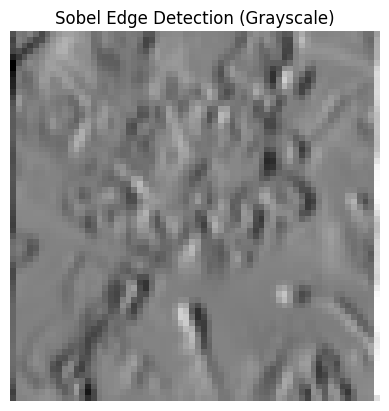

In [ ]:
grayscale_image = real_image.mean(dim=0).numpy()

# Sobel kernel for grayscale
sobel_kernel_grayscale = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

grayscale_image = grayscale_image[np.newaxis, ...]
sobel_kernel_grayscale = sobel_kernel_grayscale[np.newaxis, ...]

output_sobel_gray = conv2d(grayscale_image, sobel_kernel_grayscale, stride=1, padding=1)

plt.imshow(output_sobel_gray[0], cmap='gray')
plt.title("Sobel Edge Detection (Grayscale)")
plt.axis("off")
plt.show()

The convolution operation highlights specific features in the image based on the chosen kernel.
The Sobel kernel emphasizes edges, making it useful for edge detection tasks.
Convolution on grayscale images simplifies computations and focuses on intensity patterns.
